<!-- html title in the middle -->
<p style="text-align: center;">
    <h1 style="text-align: center;">Time Series Data Generator Library</h1>
    <h3 style="text-align: center;">A tool for generating synthetic time series data</h3>
</p>





In [1]:
# Import the DataGen class from the ts_data_generator module and some utility functions 
from ts_data_generator import DataGen
from ts_data_generator.schema.models import Granularity
from ts_data_generator.utils.trends import SinusoidalTrend, LinearTrend, WeekendTrend
from ts_data_generator.utils.functions import random_choice
import matplotlib.pyplot as plt

In [26]:
d = DataGen()
d.start_datetime = "2019-01-01"
d.end_datetime = "2019-01-10"
d.granularity = Granularity.FIVE_MIN
d.add_dimension("product", random_choice(["A", "B", "C", "D"]))

metric1_trend = SinusoidalTrend(name="sine", amplitude=6, freq=3, phase=0, noise_level=1.5)

d.add_metric(name="metric1", trends=[metric1_trend])

metric2_trend = SinusoidalTrend(name="sine", amplitude=3, freq=5, phase=0, noise_level=1.5)
metric3_trend = LinearTrend(name="linear", limit=60, offset=10, noise_level=1)

d.add_metric(name="metric2", trends=[metric2_trend,metric3_trend])

metric4_trend = WeekendTrend(name="weekend", weekend_effect=10, direction="up", noise_level=0.5, limit=10)
d.add_metric(name="metric3", trends=[metric4_trend])

d.generate_data()

<Axes: >

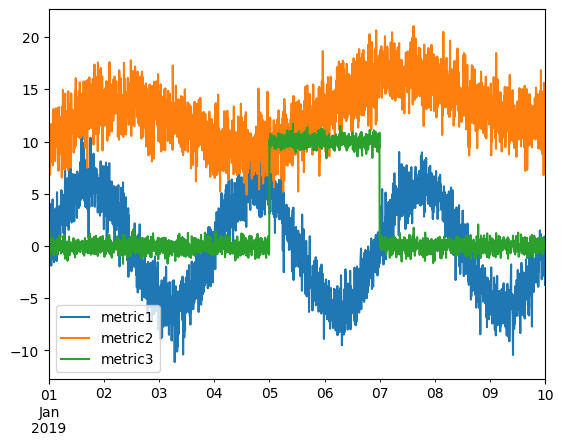

In [27]:
d.data.plot()